In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv(r'C:\Users\creat\Downloads\archive\Mall_Customers.csv')
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

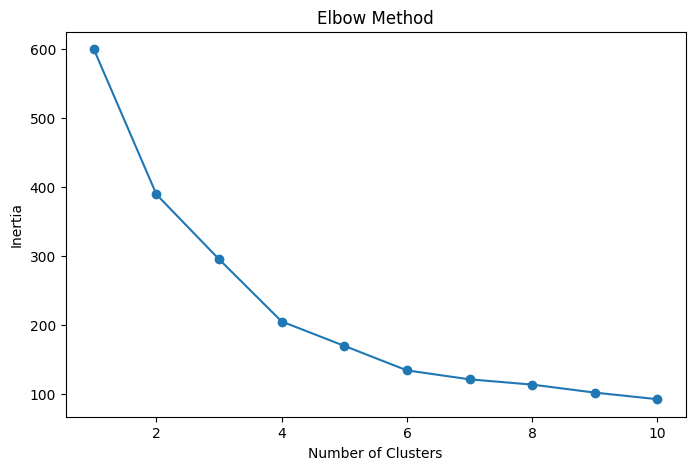

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [9]:
optimal_clusters = 4


In [10]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [11]:
labels = kmeans.labels_


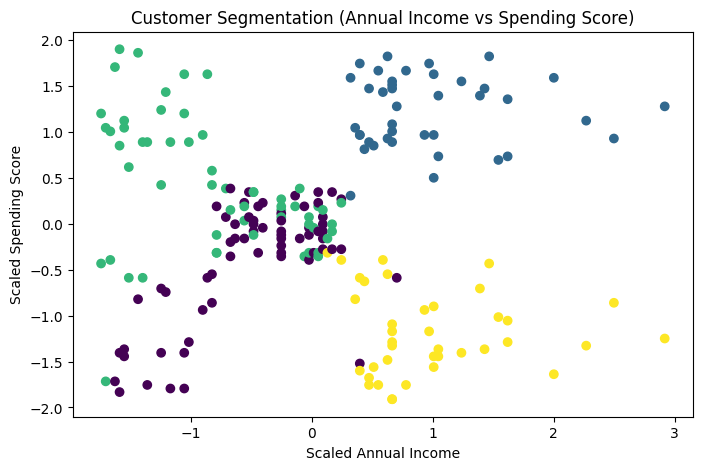

In [12]:
data['Cluster'] = labels
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title('Customer Segmentation (Annual Income vs Spending Score)')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.show()